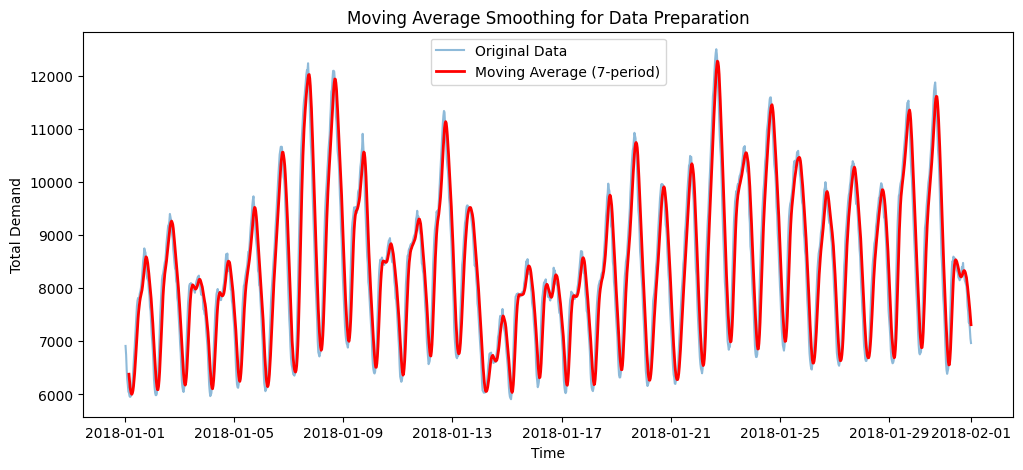

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
<ipython-input-2-697c0c478a11>:43: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='30T')[1:],


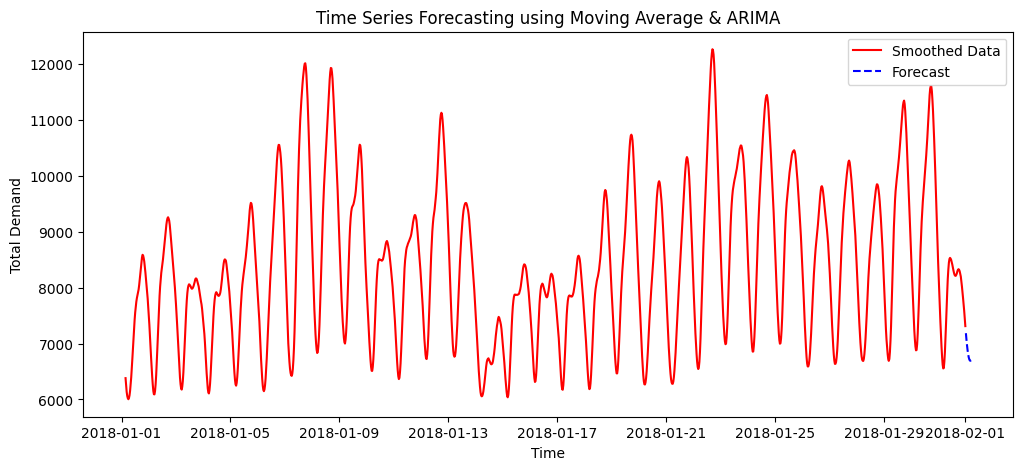

                     TOTALDEMAND  MA_Smoothed
SETTLEMENTDATE                               
2018-01-31 22:00:00      7352.80  7810.760000
2018-01-31 22:30:00      7370.29  7704.102857
2018-01-31 23:00:00      7227.34  7582.912857
2018-01-31 23:30:00      7055.73  7443.630000
2018-02-01 00:00:00      6966.93  7311.945714


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = "/PRICE_AND_DEMAND_201801_NSW1.csv"
df = pd.read_csv(file_path)

# Convert SETTLEMENTDATE to datetime and set as index
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])
df.set_index('SETTLEMENTDATE', inplace=True)

# Select only TOTALDEMAND column
df = df[['TOTALDEMAND']]

# Apply Moving Average Smoothing (7-period window)
df['MA_Smoothed'] = df['TOTALDEMAND'].rolling(window=7).mean()

# Plot Original vs. Smoothed Data
plt.figure(figsize=(12, 5))
plt.plot(df['TOTALDEMAND'], label='Original Data', alpha=0.5)
plt.plot(df['MA_Smoothed'], label='Moving Average (7-period)', linewidth=2, color='red')
plt.title('Moving Average Smoothing for Data Preparation')
plt.xlabel('Time')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

# Drop NaN values caused by rolling window
df.dropna(inplace=True)

# Fit ARIMA model (order=(2,1,2) - can be tuned)
model = ARIMA(df['MA_Smoothed'], order=(2,1,2))
model_fit = model.fit()

# Forecast Next 10 Periods
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(df['MA_Smoothed'], label='Smoothed Data', color='red')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='30T')[1:],
         forecast, label='Forecast', linestyle='dashed', color='blue')
plt.title('Time Series Forecasting using Moving Average & ARIMA')
plt.xlabel('Time')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

# Display last few values with forecast
print(df.tail())
